# Installation and usage of Julia packages
The built-in package manager of Julia is called "Pkg" and allows the dynamic download and usage of packages that are available in online repositories. A lot of those packages can be found (open source) on github and similar websites and provide some sort of documentation (some better than others).

The Jupyter Notebooks provided in this repository use so called environments that encapsulate packages (with specified versions) for each notebook. This way version conflicts among different notebooks can be prevented.

To use "Pkg" call 
```julia
using Pkg
```

Afterwards activate an environment with
```julia
Pkg.activate("/path/to/your/environment")
```
and add packages with
```julia
Pkg.add("name of some package")
Pkg.add(name="name of another package", version="1.2.3")
```

The path "/path/to/your/environment" will then contain two toml-files: "Manifest.toml" and "Project.toml" containing information about the packages used in that environment.

The notebooks in this repository use the folder "conf/name_of_the_notebook" for each notebook, e.g. "conf/01-julia_basics" for this notebook.

First time activation of environments might take several minutes due to the package manager downloading and precompiling the added packages and all of their dependencies (which easily can be thousands of packages!).

In [271]:
# tell julia to use the package "Pkg"
using Pkg
# add package "Plots" of version "1.40.9" - this will not be added to an environment since we haven't activated one (yet)
Pkg.add(PackageSpec(name="Plots", version="1.40.9"))
# activate the environment "conf/01-julia_basics"
Pkg.activate(joinpath(dirname(pwd()), "conf", "01-julia_basics"))
# create a Manifest.toml, resolve dependencies, download and precompile all packages needed for this environment
Pkg.instantiate()
# show the status of the package manager
Pkg.status()

   Resolving package versions...
  No Changes to `~/Syncthing/Programmierung/MathData-SoSe22/conf/01-julia_basics/Project.toml`
  No Changes to `~/Syncthing/Programmierung/MathData-SoSe22/conf/01-julia_basics/Manifest.toml`
  Activating project at `~/Syncthing/Programmierung/MathData-SoSe22/conf/01-julia_basics`


Status `~/Syncthing/Programmierung/MathData-SoSe22/conf/01-julia_basics/Project.toml`
⌃ [91a5bcdd] Plots v1.40.9
Info Packages marked with ⌃ have new versions available and may be upgradable.


The environments for all notebooks have been created with "conf/setup.jl" to speedup notebook execution. In principal each notebook could add their packages on every execution, but this might be very slow.

# Variables

In [272]:
my_integer = 4

4

In [273]:
typeof(my_integer)

Int64

In [274]:
my_float = 2.3

2.3

In [275]:
typeof(my_float)

Float64

In [276]:
my_complex_number = 2 + 3im
typeof(my_complex_number)

Complex{Int64}

In [277]:
my_complex_number2 = 2.2 + 3.2im
typeof(my_complex_number2)

ComplexF64 (alias for Complex{Float64})

Using the Julia REPL (command line) the following help information can be displayed
```julia
?Complex
```
which yields


search: Complex complex ComplexF32 ComplexF16 ComplexF64

  Complex{T<:Real} <: Number

  Complex number type with real and imaginary part of type T.

  ComplexF16, ComplexF32 and ComplexF64 are aliases for Complex{Float16}, Complex{Float32} and Complex{Float64} respectively.

  See also: Real, complex, real.

In [278]:
# support for latex
α = 2π

6.283185307179586

In [279]:
cos(α)

1.0

# Syntax for some basic mathematical operations

In [280]:
summation = 2 + 3

5

In [281]:
difference = 5 - 2

3

In [282]:
product = 3 * 5

15

In [283]:
quotient = 4 / 5

0.8

In [284]:
rational = 4 // 5
rational, typeof(rational)

(4//5, Rational{Int64})

In [285]:
power = 5^2

25

In [286]:
power = 5.0^2

25.0

# Control Flow

### For loops

The syntax for a `for` loop is 
```julia
for *var* in *loop iterable*
    *loop body*
end
```

In [287]:
a = [1, 2, 3, 4, 5]
for aᵢ in a
    @show aᵢ
end

aᵢ = 1
aᵢ = 2
aᵢ = 3
aᵢ = 4
aᵢ = 5


## If statements

In [288]:
v = 3
w = 3

if v < w
    println("v < w")
elseif v > w
    println("v > w")
else
    println("v == w")
end

v == w


# Arrays

Julia has built-in support multi-dimensional arrays (i.e. tensors).

In [289]:
vector = [1, 2, 3, 4, 5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [290]:
matrix = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [291]:
spacing_matrix = [1 2 3
                  4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [292]:
random_matrix = rand(1:10, 4, 5)

4×5 Matrix{Int64}:
 6  8   9  4  10
 8  5  10  6  10
 2  5   7  2   1
 7  8   2  2   3

In [293]:
random_tensor = rand(1:10, 2, 3, 4)

2×3×4 Array{Int64, 3}:
[:, :, 1] =
 2  2  9
 3  4  5

[:, :, 2] =
 5  3  2
 4  4  8

[:, :, 3] =
 9  5  8
 4  4  6

[:, :, 4] =
  7  10  7
 10   6  2

### Manipulating Arrays 

In [294]:
vector

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [295]:
vector[2:4]

3-element Vector{Int64}:
 2
 3
 4

In [296]:
vector[4:end]

2-element Vector{Int64}:
 4
 5

In [297]:
matrix

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [298]:
matrix[:, 2]

2-element Vector{Int64}:
 2
 5

In [299]:
matrix[1,:]

3-element Vector{Int64}:
 1
 2
 3

In [300]:
matrix[:, 1:2]

2×2 Matrix{Int64}:
 1  2
 4  5

In [301]:
[vector vector]

5×2 Matrix{Int64}:
 1  1
 2  2
 3  3
 4  4
 5  5

In [302]:
[vector; vector]

10-element Vector{Int64}:
 1
 2
 3
 4
 5
 1
 2
 3
 4
 5

In [303]:
[matrix matrix]

2×6 Matrix{Int64}:
 1  2  3  1  2  3
 4  5  6  4  5  6

In [304]:
[matrix; matrix]

4×3 Matrix{Int64}:
 1  2  3
 4  5  6
 1  2  3
 4  5  6

# Functions, Multiple Dispatch

A typical function has the form
```julia
function *func_name*(*arg1*, *arg2*, ...)
   *body* 
end
```

In [305]:
function biased_sum(a, b)
    a + b + 2
end 

biased_sum (generic function with 3 methods)

In [306]:
biased_sum(2, 3)

2

In [307]:
methods(biased_sum)

# 3 methods for generic function "biased_sum" from Main:
 [1] biased_sum(a::Integer, b::Integer)
     @ ~/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y101sZmlsZQ==.jl:1
 [2] biased_sum(a::Complex, b)
     @ ~/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y105sZmlsZQ==.jl:1
 [3] biased_sum(a, b)
     @ ~/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:1

In [308]:
function biased_sum(a::Integer, b::Integer)
    a + b - 3
end

biased_sum (generic function with 3 methods)

In [309]:
biased_sum(2, 3)

2

In [310]:
biased_sum(5.0, 2.0)

9.0

In [311]:
methods(biased_sum)

# 3 methods for generic function "biased_sum" from Main:
 [1] biased_sum(a::Integer, b::Integer)
     @ ~/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y101sZmlsZQ==.jl:1
 [2] biased_sum(a::Complex, b)
     @ ~/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y105sZmlsZQ==.jl:1
 [3] biased_sum(a, b)
     @ ~/Syncthing/Programmierung/MathData-SoSe22/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:1

In [312]:
biased_sum(a::Complex, b) = a + b - 2im

biased_sum (generic function with 3 methods)

In [313]:
biased_sum(2+3im, 2)

4 + 1im

In [314]:
# Keyword arguments

In [315]:
function biased_pow(a, b; bias::Bool = true)
    if bias
        a^b - 3
    else
        a^b
    end
end

biased_pow (generic function with 1 method)

In [316]:
biased_pow(2, 3)

5

In [317]:
biased_pow(2, 3; bias = false)

8

In [318]:
biased_pow(2, 3; bias = true)

5

# Linear Algebra

In [319]:
using LinearAlgebra

In [320]:
b = [1; 2; 1]
A = [1 2 3; 2 3 5; 1 0 4]

3×3 Matrix{Int64}:
 1  2  3
 2  3  5
 1  0  4

In [321]:
dot(b, b)

6

In [322]:
b ⋅ b 

6

In [323]:
det(A)

-3.0

In [324]:
cross(b, A[:,2])

3-element Vector{Int64}:
 -3
  2
 -1

In [325]:
v = b × A[:,2]

3-element Vector{Int64}:
 -3
  2
 -1

In [326]:
v ⋅ b

0

In [327]:
w = A\b

3-element Vector{Float64}:
  1.0
 -0.0
  0.0

In [328]:
b - A*w

3-element Vector{Float64}:
 0.0
 0.0
 0.0

# Statistic

In [329]:
using Statistics, Plots

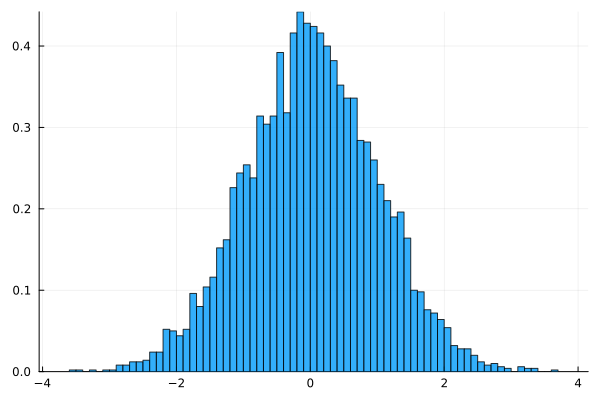

In [330]:
Ω = randn(5000);
histogram(Ω, legend = false, norm=true, nbins = 100, alpha = 0.8)

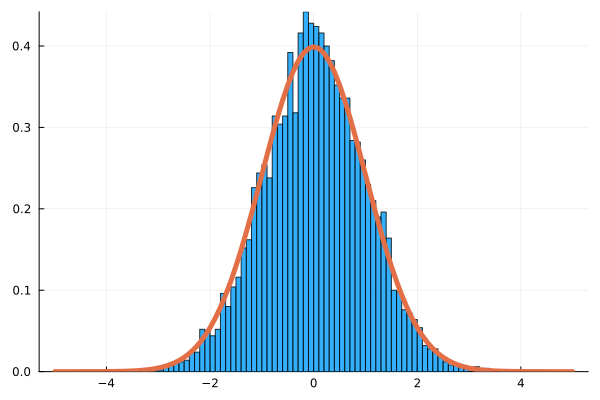

In [331]:
x = -5:0.1:5
plot!(x, 1/sqrt(2*π) .* exp.(-x.^2 ./ 2), linewidth = 5)

In [332]:
mean(Ω)

0.026244462221665578

In [333]:
var(Ω)

0.9588196905405082